## This notebook plots results for the evolution of the degeneracy parameter $\psi$ wrt time

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

from matplotlib import rc
rc('font', family='baskerville', size=22.)
rc('text', usetex=True)

In [21]:
# import data
alpha = 0.006
data  = np.genfromtxt("../data/evolution_degeneracy_alpha="+str(alpha)+".dat", unpack=True)
time  = data[0]
psi   = data[1]

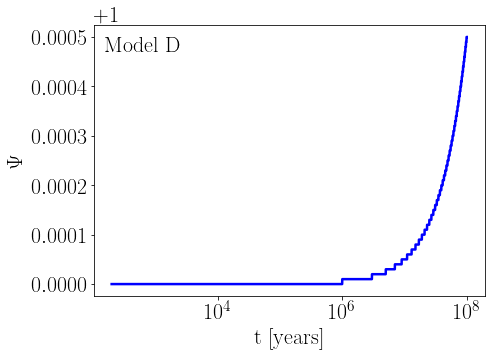

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(time, psi, lw=2.5, color="blue")

text_box = AnchoredText("Model D", frameon=False, loc=2, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

#ax.grid(ls='--', alpha=0.5, which="both") # plot grid
#for axis in ['top','bottom','left','right']: # change linesize of borders - aesthetics
#    ax.spines[axis].set_linewidth(1.5)
                        
ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")